# Analysis

> Fill in a module description here

In [ ]:
#| default_exp analysis

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#|hide
#|export
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#| hide
# Define style
sns.set()
sns.set_context('talk')
sns.set_style('ticks')

In [ ]:
#| export
# Process data
def getEvents(data, samplerate):
    '''
    Recover event timings
    Args:
        data: 1d array containing event signals recorded at each timepoint
        samplerate: samplerate of recording (Hz)
    Returns:
        events: 4 x t array with event onset IDs; 1 at timepoint where event starts
    '''
    
    # Define pulse lengths (ms)
    STARTPULSE = 50
    ENDPULSE = 100
    EVENT1PULSE = 150
    EVENT2PULSE = 200
    
    # Create empty array - 4 x t
    events = np.zeros((4, len(data)))
    
    # Define threshold - 0.75x max value (digital signal)
    threshold = 0.75 * np.max(data)
    
    # Define cutoffs - number of samples, set at midpoint between event types
    event2_cutoff = (175 / 1000) * samplerate
    event1_cutoff = (125 / 1000) * samplerate
    end_cutoff = (75 / 1000) * samplerate
    start_cutoff = (25 / 1000) * samplerate
    
    # Loop over points in data array
    idx = 0
    while idx < len(data):
        # Get current datapoint
        d = data[idx]
        
        # If point > threshold: find next point below threshold
        if d > threshold:
            # Reset state
            window = 1
            end_found = False
            
            # Continue until value drops below threshold or data ends
            while(idx + window <= len(data) and end_found == False):
                # Check if dropped below threshold
                if data[idx + window] < threshold:
                    end_found = True
                
                window += 1
                
            # If end found: assign to event type
            if end_found:
                if window > event2_cutoff:
                    events[3, idx] = 1
                elif window > event1_cutoff:
                    events[2, idx] = 1
                elif window > end_cutoff:
                    events[1, idx] = 1
                elif window > start_cutoff:
                    events[0, idx] = 1
                    
                # Move current point to end of window
                idx = idx + window
            
        # Move to next datapoint
        idx += 1
        
    # Return events list
    return events

In [ ]:
#|hide
# Load example data - recorded signals using oscilloscope
data = np.loadtxt('./example_data/all_triggers.csv', delimiter=',', skiprows=2, usecols=[0,1])
samplerate = 250 # Hz

# Split data into time and voltage
t = data[:, 0]
v = data[:, 1]

t = t + 0.5 #|hide_line

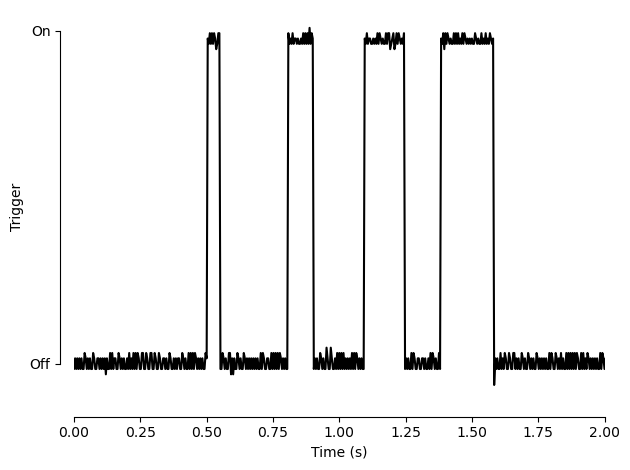

In [ ]:
#|echo: false
# Plot figure
fig, ax = plt.subplots()

ax.plot(t, v, 'k')

ax.set(
    xlabel = 'Time (s)',
    ylabel = 'Trigger',
    xlim = (0, 2),
    yticks = (0, 0.5),
    yticklabels = ['Off', 'On']
)

sns.despine(ax=ax, offset=10, trim=True)
fig.tight_layout()

In [ ]:
# Recover event data
events = getEvents(v, samplerate)

[[<matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>]]

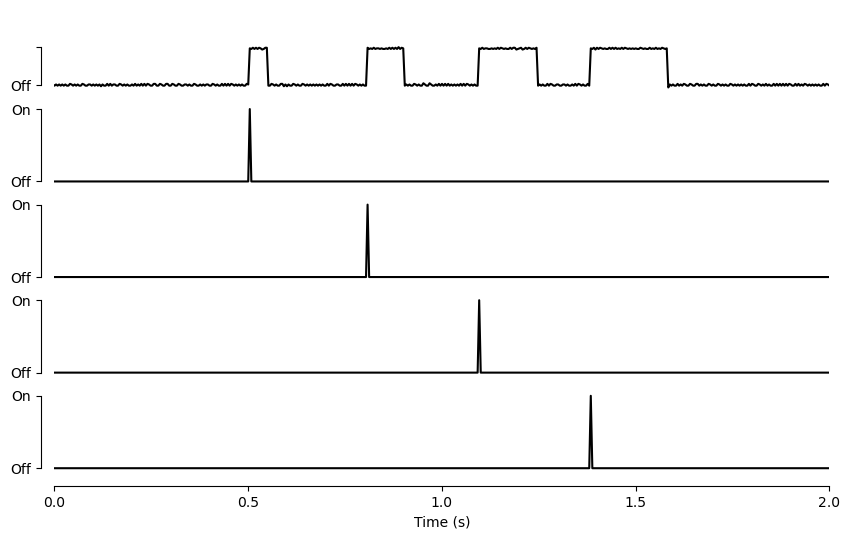

In [ ]:
# Plot results
# Plot results
fig, ax = plt.subplots(5, 1, sharex='row', figsize=(10,6))

ax[0].plot(t, v, 'k')
ax[1].plot(t, events[0,:], 'k')
ax[2].plot(t, events[1,:], 'k')
ax[3].plot(t, events[2,:], 'k')
ax[4].plot(t, events[3,:], 'k')

for ax_ in ax: #|hide_line
    sns.despine(ax=ax_, offset=10, trim=True) #|hide_line
    
    ax_.set( #|hide_line
        yticks = (0, 1), #|hide_line
        yticklabels = ['Off', 'On'], #|hide_line
        xlim = (0, 2) #|hide_line
    ) #|hide_line
    
for ax_ in ax[:-1]: #|hide_line
    ax_.get_xaxis().set_visible(False) #|hide_line
    ax_.spines['bottom'].set_visible(False) #|hide_line
    
ax[-1].set( #|hide_line
    xlabel = 'Time (s)', #|hide_line
) #|hide_line

ax[0].set( #|hide_line
    yticks = (0, np.max(v)) #|hide_line
) #|hide_line

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()